In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')
jovian.set_colab_id('1NV3YP_3q6Par9fgWVyPVYwKTk3rfNkpy')

     |████████████████████████████████| 68 kB 3.9 MB/s 


# US Accidents Exploratory Data Analysis

TODO - talk about EDA

TODO - talk about the dataset(source, what it contains, how it will be useful)
   - Kaggle
   -information about accidents
   -can be useful to prevent accidents
   -mention that this doesn,t contain data for New York



In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: awesomeahmed321go
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 155MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## Data Preparation and Cleaning

1. Load the data using Pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(data_filename)

In [7]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [8]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

### Percenatge of misssing values per column

In [12]:
missing_percentages = df.isna().sum().sort_values(ascending=False) /len(df)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

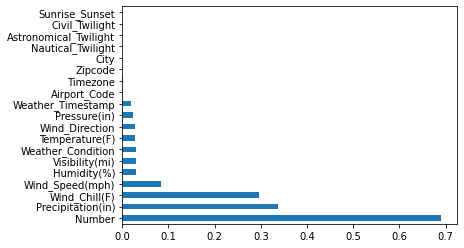

In [13]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use.

## Exploratory Analysis and Visualization
Columns we will Analyze
1. City
2. Start Time
3. Start Lat
4. Start Long
5. Temperature
6. Weather Conditions

In [14]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [15]:
Cities = df.City.unique()
len(Cities)

10658

In [16]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
                ...  
Martville           1
Guysville           1
Damariscotta        1
East Norwich        1
Glen Flora          1
Name: City, Length: 10657, dtype: int64

In [17]:
'New York' in df.City

False

In [18]:
'NY' in df.State

False

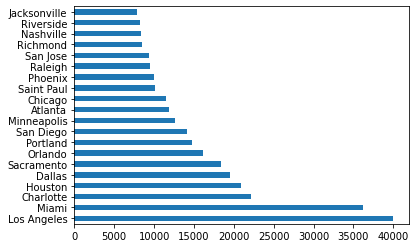

In [19]:
cities_by_accidents[:20].plot(kind='barh')

In [20]:
import seaborn as sns 
sns.set_style('darkgrid')

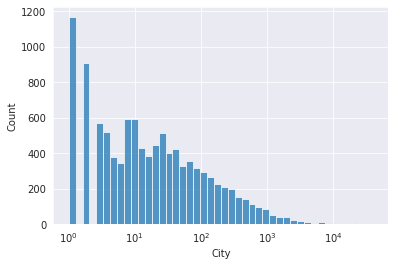

In [21]:
sns.histplot(cities_by_accidents, log_scale=True)

In [22]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [23]:
len(high_accident_cities)/len(Cities)

0.023550384687558643

In [24]:
cities_by_accidents[cities_by_accidents == 1]

Dillonvale             1
Winter Garden-Ocoee    1
Fort Peck              1
East Hampstead         1
Brierfield             1
                      ..
Martville              1
Guysville              1
Damariscotta           1
East Norwich           1
Glen Flora             1
Name: City, Length: 1167, dtype: int64

### Start Time

In [25]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [27]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


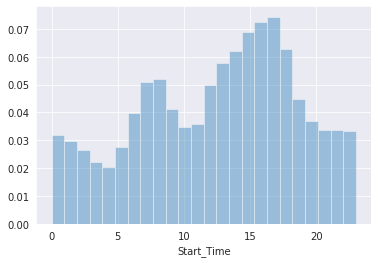

In [28]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occurs between 6 am to 10 am and 2pm to 7 pm part of the day.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


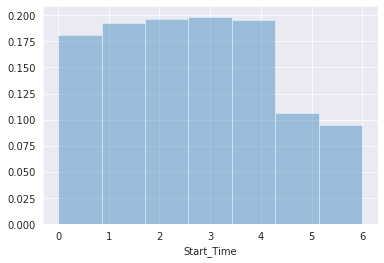

In [29]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays ?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


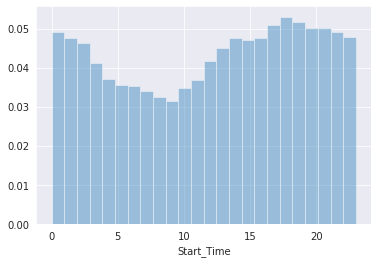

In [30]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


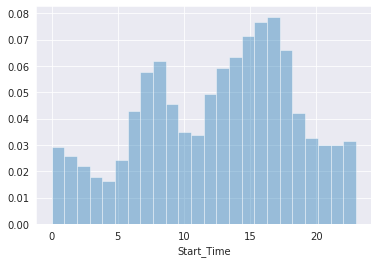

In [31]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 1]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


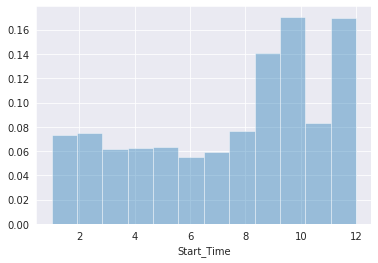

In [32]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Can you explain the month-wise trend of accidents ?

- Much data missing for  2016.

### Start Latitude and Longitude

In [33]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [34]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [35]:
sample_df = df.sample(int(0.1 * len(df)))

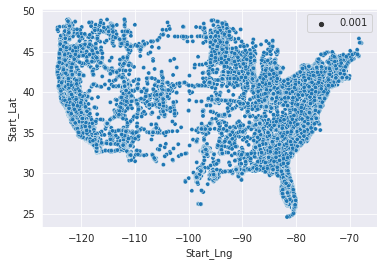

In [36]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [37]:
import folium

In [38]:
from folium.plugins import HeatMap

In [39]:
sample_df2 = df.sample(int(0.01 * len(df)))
lat_lon_pairs = list(zip(list(sample_df2.Start_Lat), list(sample_df2.Start_Lng)))

In [40]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask and Answer Questions

1. Are there more accidents in warmer or colder areas ?
2. Which 5 states have the highest number of accidents ? How about per capita ?
3. Does New York show up in the data ? If YES, why is the count lower if its the most populated city..?
4. Among the top 100 cities in number of accidents, which states do they belong to most freqeuntly ?
5. At what of the day the accidents are more frequent ?
6. Which day of the week have most accidents ? Which month has most accidents ?
7. What is the trend of the accidents year or year (increasing/decreasing) ?
8. When is accidents per unit of traffic the highest ?


## Summary and Conclusion

INSIGHTS:
- No data for New York.
-the number of accidents per city decreases exponentailly.
- Nearly 2% of the cities have more than 1000 yearly accidents.
- Over 1150 cities have reported just 1 accident per year.(need to invegtigate)

**Here was a small EDA of a huge dataset with some of its attributes. Since there are many more columns to be explored and analyzed to get meaningful insights, there is always room for future analysis and questions to be answered.**